In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
data = sm.datasets.sunspots.load_pandas()
df = data.data
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
df.index = df['YEAR']
del df['YEAR']
df

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
...,...
2004-01-01,40.4
2005-01-01,29.8
2006-01-01,15.2


Text(0, 0.5, 'SUNACTIVITY')

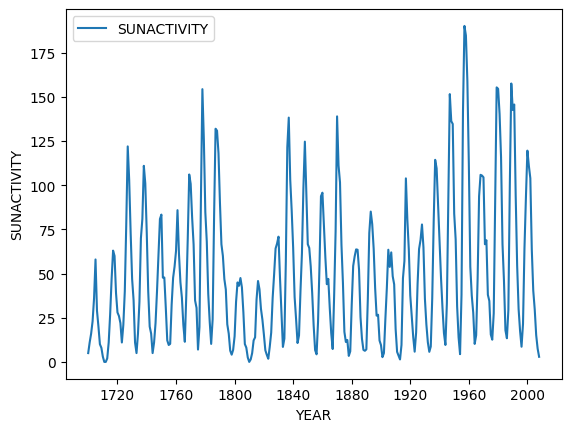

In [4]:
sns.lineplot(df)
plt.ylabel("SUNACTIVITY")

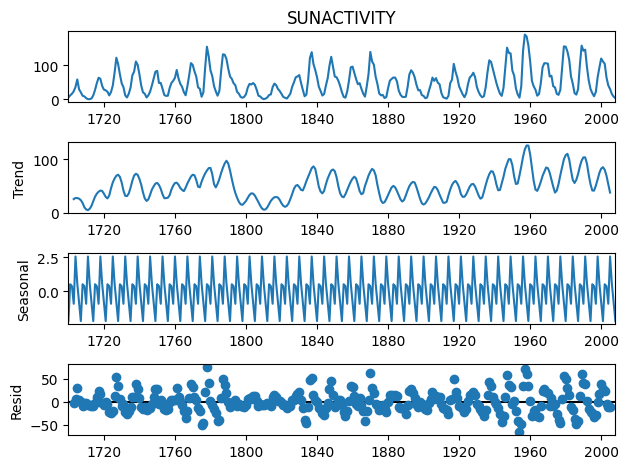

In [5]:
decompose = seasonal_decompose(df['SUNACTIVITY'],model='additive', period=7)
decompose.plot()
plt.show()

# Stationarity

In [6]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

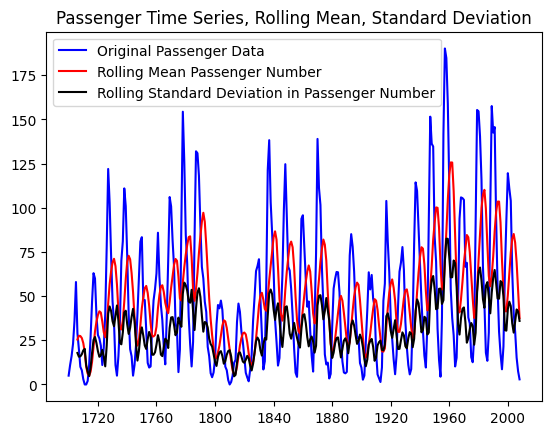

In [7]:
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

In [8]:
adft = adfuller(df,autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0   -2.837781              Test Statistics
1    0.053076                      p-value
2    8.000000             No. of lags used
3  300.000000  Number of observations used
4   -3.452337          critical value (1%)
5   -2.871223          critical value (5%)
6   -2.571929         critical value (10%)


# Autocorrelation

In [11]:
for i in range(1, 16):
    autocorr_lag = df['SUNACTIVITY'].autocorr(lag = i)
    print(f"{i} year lag: {autocorr_lag}")

1 year lag: 0.8236288837177274
2 year lag: 0.4546179988775737
3 year lag: 0.039874664758565076
4 year lag: -0.2789895531196348
5 year lag: -0.43024863085060866
6 year lag: -0.38112013056812055
7 year lag: -0.15984213890009077
8 year lag: 0.16131299934421808
9 year lag: 0.4857862883760332
10 year lag: 0.6793049702157588
11 year lag: 0.6721213066213503
12 year lag: 0.47365972969783576
13 year lag: 0.16859199414194787
14 year lag: -0.12754752453944432
15 year lag: -0.3312018470450763


**ряд є стаціонарним, автокореляція слабка**

In [17]:
import warnings
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
l =[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.arima.ARIMA(df, order=param)
            results = mod.fit()
            l.append(results.aic)
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print(min(l))

C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(0, 0, 0)x(0, 0, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(0, 0, 1) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(0, 1, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(0, 1, 1) - AIC:3166.5832226720604


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(0, 0, 0)x(1, 0, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 0, 1) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 1, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 1, 1) - AIC:3166.5832226720604


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vanzo\AppDa

ARIMA(0, 0, 1)x(0, 0, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(0, 0, 1) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(0, 1, 0) - AIC:2886.9006695628577


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vanzo\AppDa

ARIMA(0, 0, 1)x(0, 1, 1) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 0, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 0, 1) - AIC:2886.9006695628577


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vanzo\AppDa

ARIMA(0, 0, 1)x(1, 1, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 1, 1) - AIC:2886.9006695628577
ARIMA(0, 1, 0)x(0, 0, 0) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(0, 0, 1) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(0, 1, 0) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(0, 1, 1) - AIC:2833.115798326172


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vanzo\AppDa

ARIMA(0, 1, 0)x(1, 0, 0) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(1, 0, 1) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(1, 1, 0) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(1, 1, 1) - AIC:2833.115798326172
ARIMA(0, 1, 1)x(0, 0, 0) - AIC:2741.2781649682265
ARIMA(0, 1, 1)x(0, 0, 1) - AIC:2741.2781649682265
ARIMA(0, 1, 1)x(0, 1, 0) - AIC:2741.2781649682265


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(0, 1, 1)x(0, 1, 1) - AIC:2741.2781649682265
ARIMA(0, 1, 1)x(1, 0, 0) - AIC:2741.2781649682265
ARIMA(0, 1, 1)x(1, 0, 1) - AIC:2741.2781649682265
ARIMA(0, 1, 1)x(1, 1, 0) - AIC:2741.2781649682265
ARIMA(0, 1, 1)x(1, 1, 1) - AIC:2741.2781649682265


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(1, 0, 0)x(0, 0, 0) - AIC:2819.1691528951537
ARIMA(1, 0, 0)x(0, 0, 1) - AIC:2819.1691528951537
ARIMA(1, 0, 0)x(0, 1, 0) - AIC:2819.1691528951537
ARIMA(1, 0, 0)x(0, 1, 1) - AIC:2819.1691528951537


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(1, 0, 0)x(1, 0, 0) - AIC:2819.1691528951537
ARIMA(1, 0, 0)x(1, 0, 1) - AIC:2819.1691528951537
ARIMA(1, 0, 0)x(1, 1, 0) - AIC:2819.1691528951537
ARIMA(1, 0, 0)x(1, 1, 1) - AIC:2819.1691528951537


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(1, 0, 1)x(0, 0, 0) - AIC:2713.226344492052
ARIMA(1, 0, 1)x(0, 0, 1) - AIC:2713.226344492052
ARIMA(1, 0, 1)x(0, 1, 0) - AIC:2713.226344492052


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(1, 0, 1)x(0, 1, 1) - AIC:2713.226344492052
ARIMA(1, 0, 1)x(1, 0, 0) - AIC:2713.226344492052
ARIMA(1, 0, 1)x(1, 0, 1) - AIC:2713.226344492052


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(1, 0, 1)x(1, 1, 0) - AIC:2713.226344492052
ARIMA(1, 0, 1)x(1, 1, 1) - AIC:2713.226344492052
ARIMA(1, 1, 0)x(0, 0, 0) - AIC:2728.689589079155
ARIMA(1, 1, 0)x(0, 0, 1) - AIC:2728.689589079155
ARIMA(1, 1, 0)x(0, 1, 0) - AIC:2728.689589079155


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(1, 1, 0)x(0, 1, 1) - AIC:2728.689589079155
ARIMA(1, 1, 0)x(1, 0, 0) - AIC:2728.689589079155
ARIMA(1, 1, 0)x(1, 0, 1) - AIC:2728.689589079155
ARIMA(1, 1, 0)x(1, 1, 0) - AIC:2728.689589079155
ARIMA(1, 1, 0)x(1, 1, 1) - AIC:2728.689589079155
ARIMA(1, 1, 1)x(0, 0, 0) - AIC:2722.5115097865464


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(1, 1, 1)x(0, 0, 1) - AIC:2722.5115097865464
ARIMA(1, 1, 1)x(0, 1, 0) - AIC:2722.5115097865464
ARIMA(1, 1, 1)x(0, 1, 1) - AIC:2722.5115097865464
ARIMA(1, 1, 1)x(1, 0, 0) - AIC:2722.5115097865464
ARIMA(1, 1, 1)x(1, 0, 1) - AIC:2722.5115097865464


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python

ARIMA(1, 1, 1)x(1, 1, 0) - AIC:2722.5115097865464
ARIMA(1, 1, 1)x(1, 1, 1) - AIC:2722.5115097865464
2713.226344492052


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [21]:
mod = sm.tsa.arima.ARIMA(df, order=(1, 0, 1))
results = mod.fit()


C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\vanzo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [22]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7921      8.077      6.041      0.000      32.962      64.623
ar.L1          0.7355      0.046     15.921      0.000       0.645       0.826
ma.L1          0.5194      0.048     10.798      0.000       0.425       0.614
sigma2       369.1788     25.783     14.319      0.000     318.646     419.712


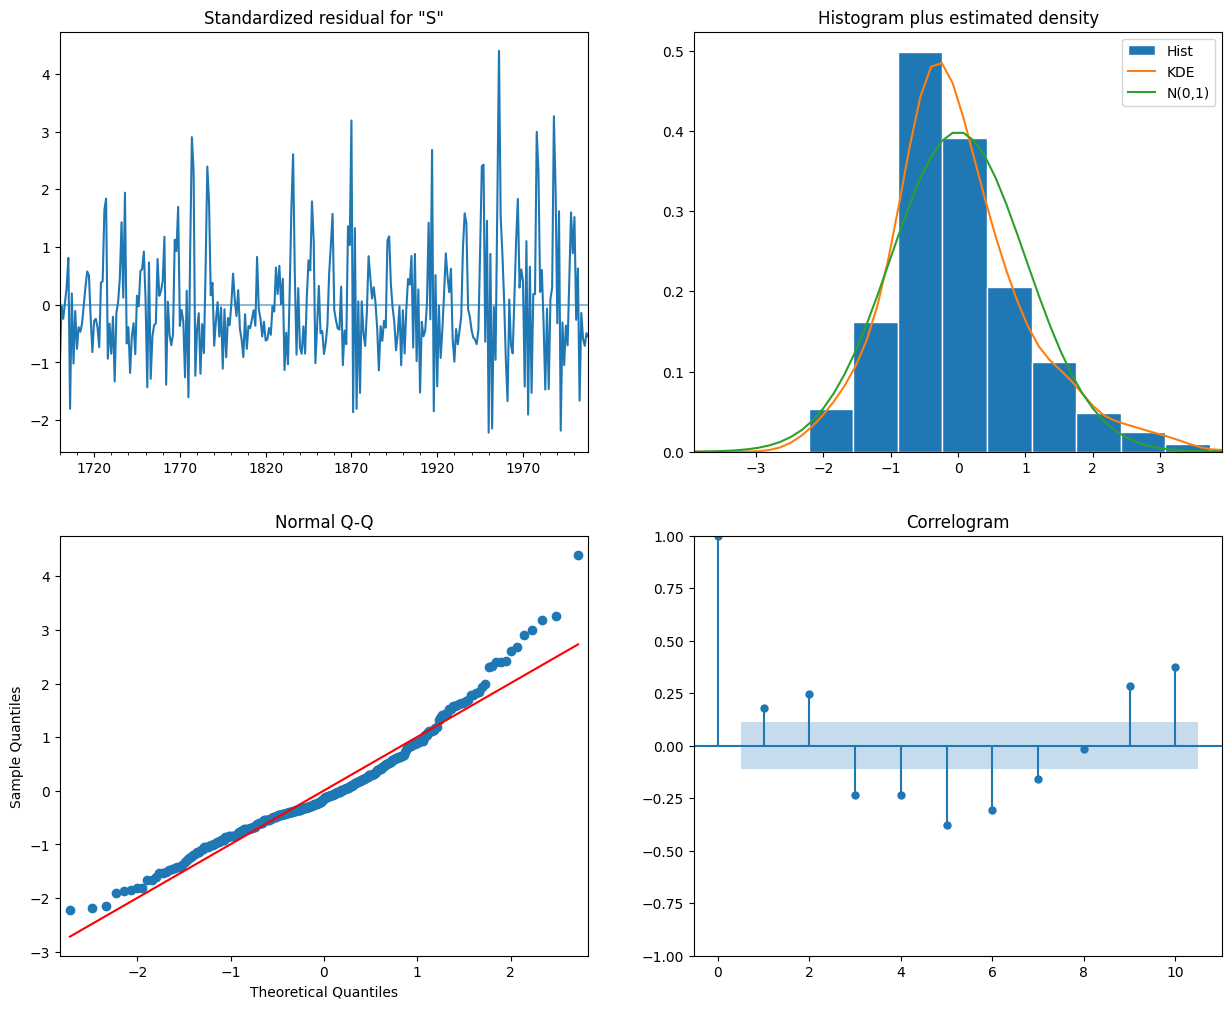

In [23]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [38]:
forecast = results.predict(start=0,end=340, dynamic=False)

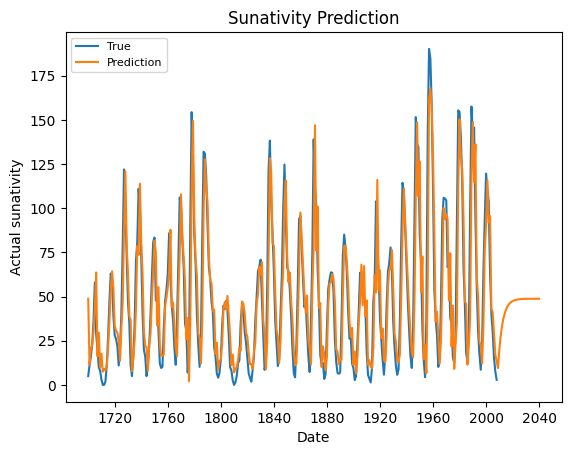

In [39]:
plt.plot(df, label='True')
plt.plot(forecast, label='Prediction')
plt.title('Sunativity Prediction')
plt.xlabel('Date')
plt.ylabel('Actual sunativity')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [40]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(df,forecast[:309]))
print("RMSE: ", rms)

RMSE:  19.338700584258593


In [41]:
pred_uc = results.get_forecast(steps=20)

pred_ci = pred_uc.conf_int()

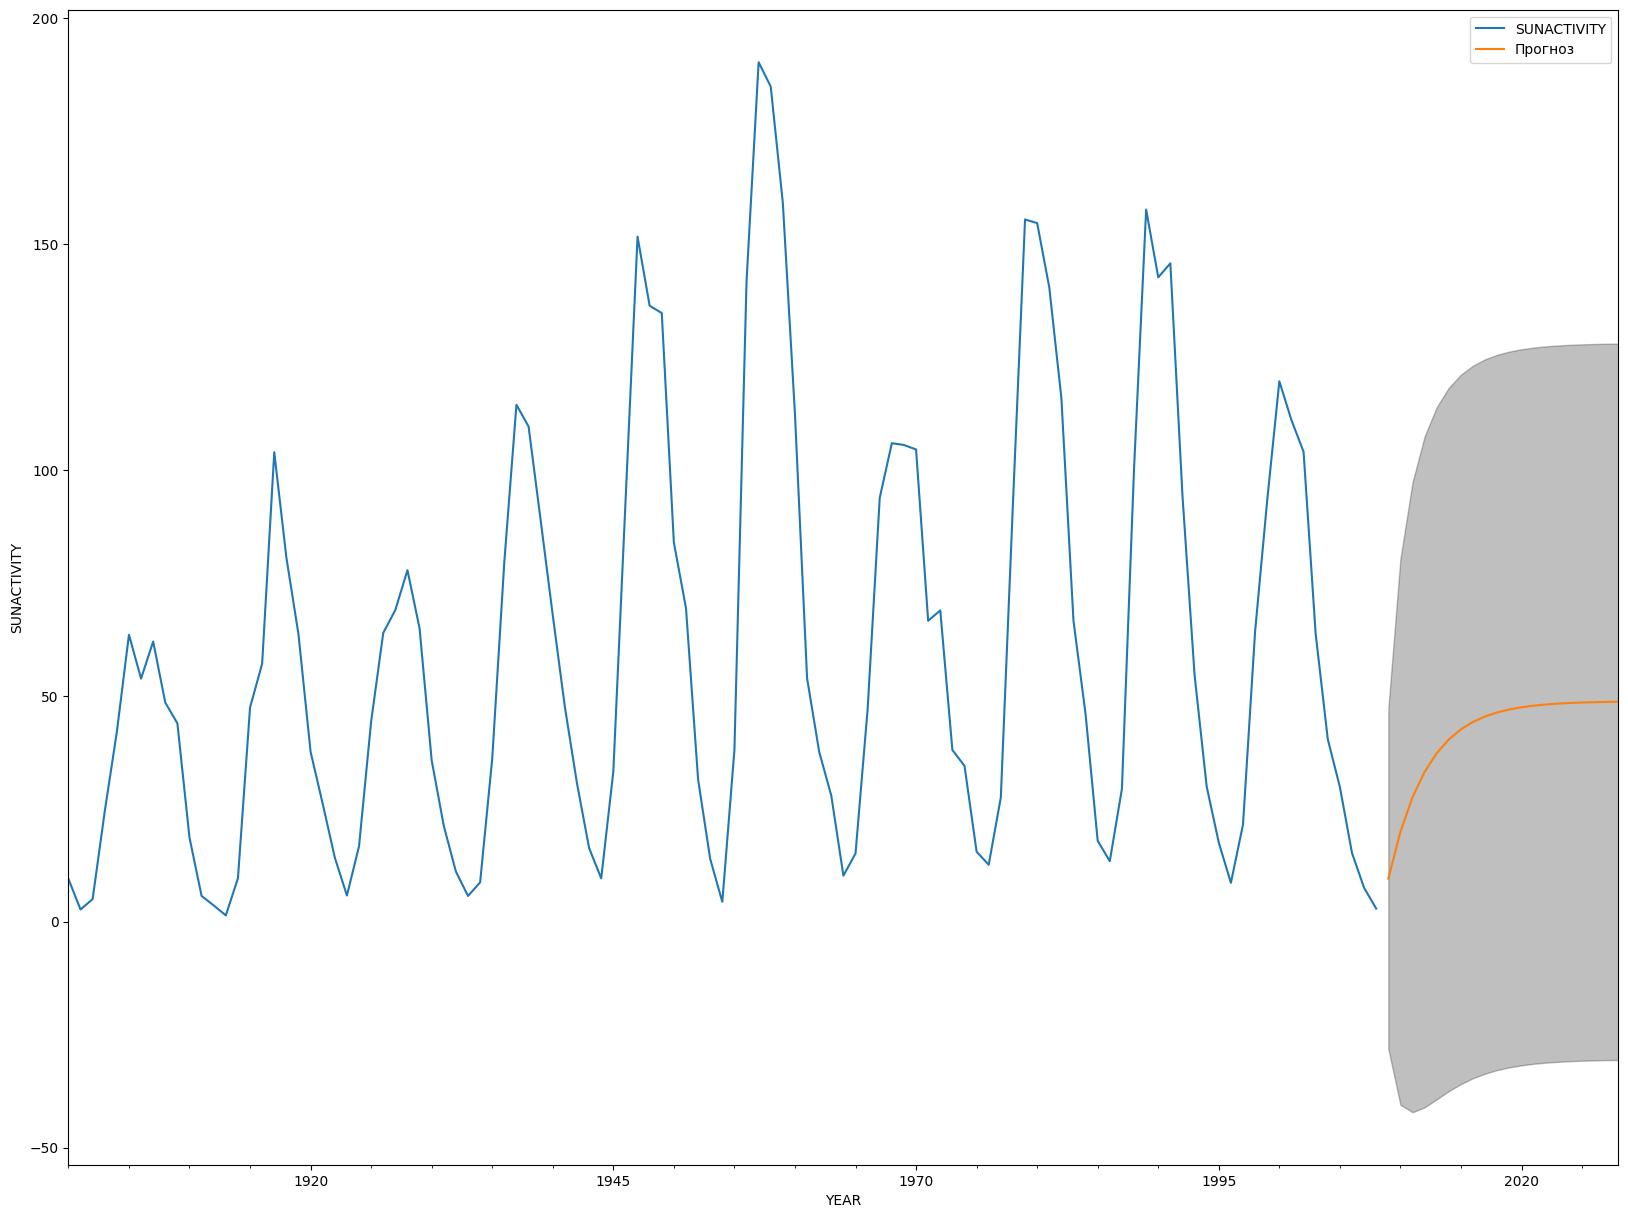

In [42]:
ax = df[200:].plot(label='Відомі', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('YEAR')
ax.set_ylabel('SUNACTIVITY')
plt.legend()
plt.show()